<h2><font color="#004D7F" size=6>Módulo 3. Procesamiento de datos</font></h2>



<h1><font color="#004D7F" size=5>2. Transformación de datos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Alberto Paternina León</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías y CSV](#section11)
* [2. Transformaciones](#section2)
    * [2.1. Escalamiento](#section21)
    * [2.2. Estandarización](#section22)
    * [2.3. Normalización](#section23)
    * [2.4. Binarización](#section24)
    * [2.5. Box-Cox](#section25)
    * [2.6. Yeo-Johnson](#section26)

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

Los datos en bruto, sin analizar de antemano, muy difícilmente nos va a dar precisiones robustas ya que, entre otros aspectos, muchos de ellos requieren los datos en una forma específica, por lo que deberemos realizar una transformación del conjunto de datos. Por otro lado, otros algoritmos pueden funcionar mejor si los datos se preparan de una manera específica, por ejemplo, los de tipo árbol con atributos característica de tipo nominal. Por tanto, es de vital importancia realizar un preprocesamiento a nuestro datos como parte fundamental de realizar un proyecto de machine learning.

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Librerías y CSV</font>

Para esta práctica vamos a cargar el conjunto de datos de Pima Indian Diabetes y trabajar diferentes tipos de transformaciones de datos. Así mismo, en algunas de ellas vamos a trabajar otros conjuntos de datos para ver un mejor impacto en su transformación.

Por otro lado, en cuanto a las librerías, vamos a ver llamarlas según cada transformación. Tenga en cuenta que estas trasnformaciónes vamos a trabajarlas con la librería **Scikit-learn**.

In [9]:
import pandas as pd
import numpy as np

# Ruta del archivo CSV
filename = 'data/countries.csv'

# Definir los nombres de las columnas
names = ['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code', 
         'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id', 'languages', 
         'name', 'neighbours', 'numeric', 'phone', 'population', 'postal_code_format', 
         'postal_code_regex', 'tld']

# Cargar los datos desde el archivo CSV con delimitador punto y coma
data = pd.read_csv(filename, sep=';', names=names, header=0)

# Convertir los datos a una matriz numpy
array = data.values

# Separamos los datos en características (X) y etiquetas (Y)
# En este caso, usaremos "continent" como la etiqueta y las demás columnas como características
X = array[:, 0:18]  # todas las filas y columnas de 0 a 17
Y = array[:, 4]     # todas las filas y la columna 4 (que es 'continent')



<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
## <font color="#004D7F"> 2. Transformaciones</font>

El método de ajuste y transformación múltiple es el enfoque preferido. Llama a la función `fit()` para preparar los parámetros de la transformación una vez en sus datos. Luego, puede usar la función `transform()` en los mismos datos para prepararlos para el modelado y nuevamente en el conjunto de datos de prueba o validación o los nuevos datos que puede ver en el futuro. El ajuste y transformación combinados es una conveniencia que puede usar para tareas únicas. Esto puede ser útil si está interesado en trazar o resumir los datos transformados y se utilizará la función `fit_transform()`. Puede revisar la API [**sklearn.preprocessing**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). Como puede verse existe una gran cantidad de funciones que podemos aplicar en esta fase de preprocesamiento según la necesidad de nuestros datos.

Es importante ver como quedan los datos antes y después de transformarlos. En el siguiente código puede ver como quedan los datos originales y comparlos con cada transformación.

<div class="alert alert-block alert-info">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
En la nueva versión de seaborn ha quedado "deprecated" la función `distplot` . Para esta visualización se utilizará `histplot` o `kdeplot` tal y como lo pone ya en el caja de código.
</div> 

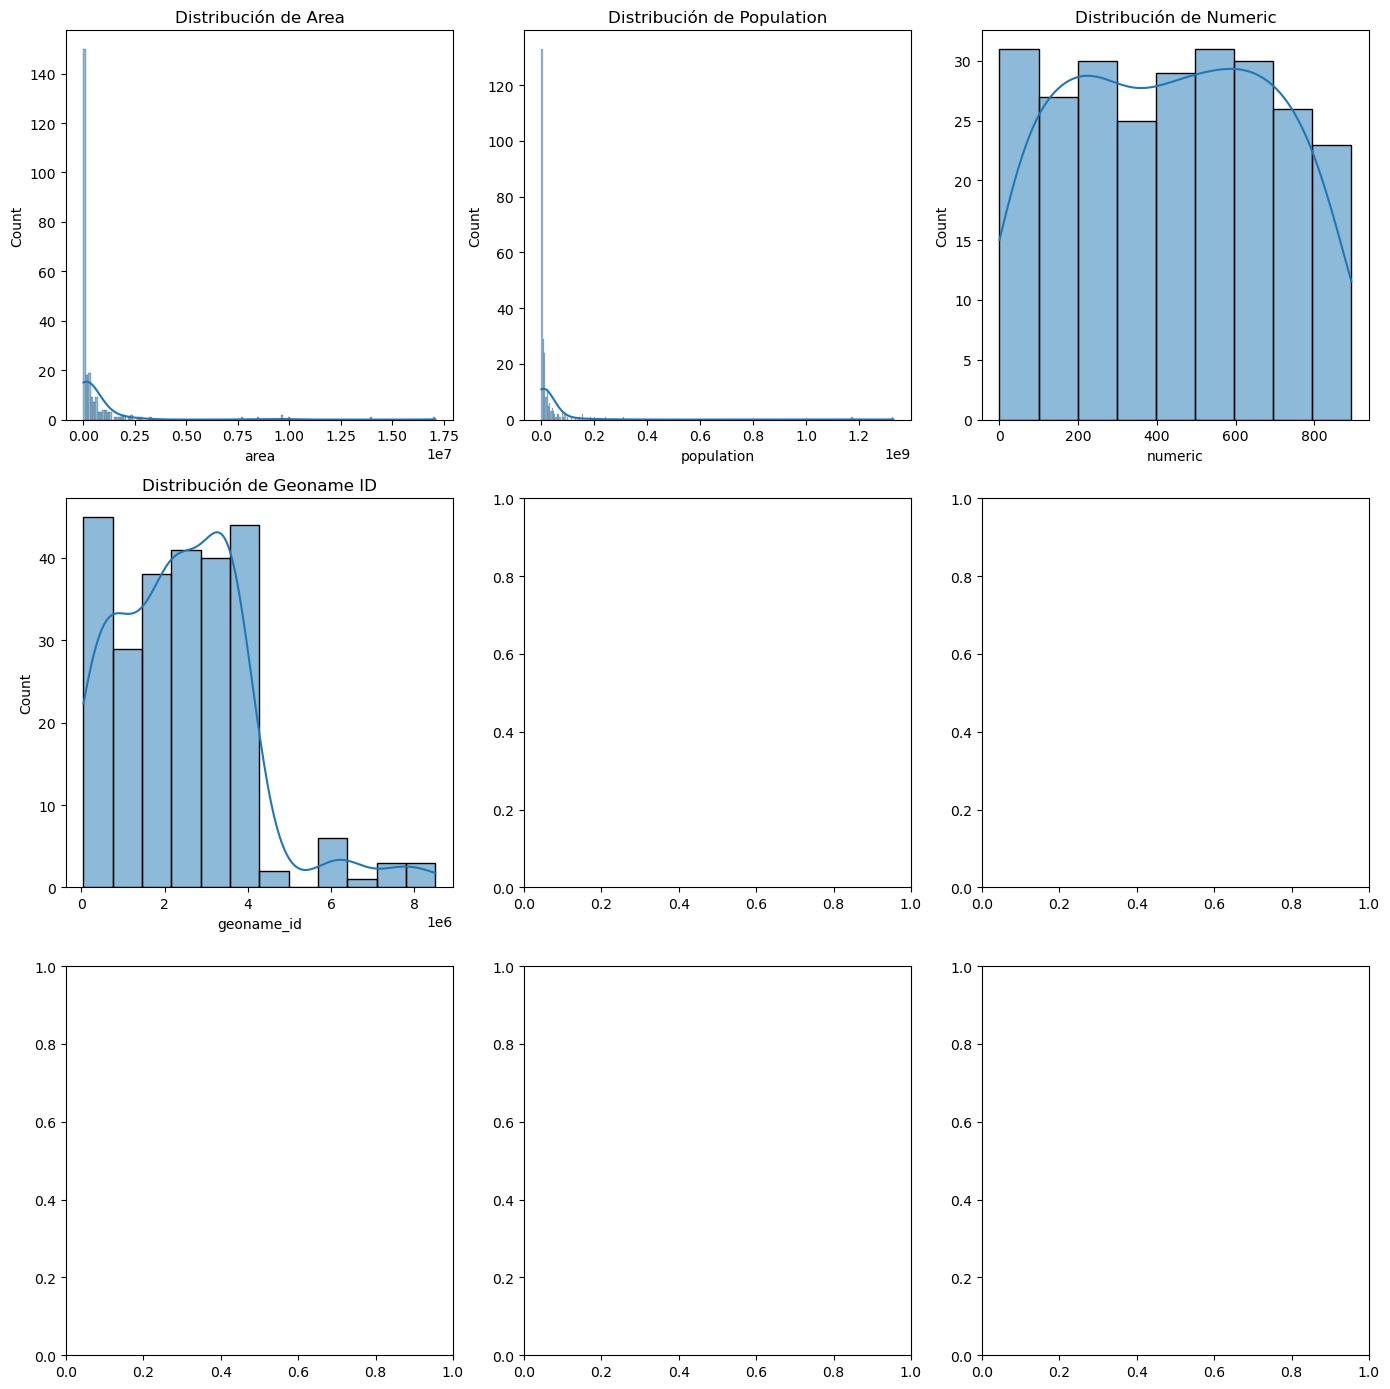

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el archivo CSV con el delimitador de punto y coma
filename = 'data/countries.csv'
names = ['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code', 
         'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id', 'languages', 
         'name', 'neighbours', 'numeric', 'phone', 'population', 'postal_code_format', 
         'postal_code_regex', 'tld']
data = pd.read_csv(filename, sep=';', names=names, header=0)

# Asegúrate de que las columnas numéricas están en el formato adecuado
data['area'] = pd.to_numeric(data['area'], errors='coerce')
data['population'] = pd.to_numeric(data['population'], errors='coerce')
data['numeric'] = pd.to_numeric(data['numeric'], errors='coerce')
data['geoname_id'] = pd.to_numeric(data['geoname_id'], errors='coerce')

# Seleccionar solo las columnas numéricas
numerical_columns = ['area', 'population', 'numeric', 'geoname_id']

# Crear los gráficos de distribuciones de densidad
f, axes = plt.subplots(3, 3, figsize=(14, 14))

# Gráfica las distribuciones de densidad para las columnas numéricas
sns.histplot(data['area'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Area')

sns.histplot(data['population'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Population')

sns.histplot(data['numeric'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribución de Numeric')

sns.histplot(data['geoname_id'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Geoname ID')


# Ajustar la presentación
plt.tight_layout()
plt.show()


<a id="section21"></a>
## <font color="#004D7F"> 2.1. Escalamiento</font>

Esta transformación es útil para los algoritmos de optimización utilizados en el núcleo de los algoritmos de aprendizaje automático como Gradiente Descendiente. También es útil para algoritmos que ponderan entradas como Regression y Neural Networks y algoritmos que usan medidas de distancia como _k_-Nearest Neighbours. Puede reescalar sus datos usando la clase [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). 

Después de reescalar puede ver que todos los valores están en el rango $[0,1]$,

In [18]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Definir las columnas numéricas del conjunto de datos de países
numerical_columns = ['area', 'population', 'gdp', 'life_expectancy', 'education_index', 'internet_users', 'urbanization']

# Verificar si las columnas existen en el DataFrame
existing_columns = [col for col in numerical_columns if col in data.columns]

if not existing_columns:
	raise KeyError(f"None of the specified columns {numerical_columns} exist in the DataFrame.")

# Asegúrate de que los datos estén correctamente cargados en la variable 'data'
X = data[existing_columns].values  # Usamos solo las columnas numéricas existentes
names = existing_columns  # Las columnas numéricas que vamos a reescalar

# Crear el objeto MinMaxScaler para reescalar entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Ajustar y transformar los datos numéricos
rescaledX = scaler.fit_transform(X)

# Configurar la precisión a 3 decimales para la impresión
np.set_printoptions(precision=3)

# Imprimir los nombres de las columnas (etiquetas)
print(names)

# Imprimir las primeras 5 filas de los datos reescalados
print(rescaledX[0:5, :])




['area', 'population']
[[2.737e-05 6.316e-05]
 [4.847e-03 3.741e-03]
 [3.787e-02 2.189e-02]
 [2.591e-05 6.523e-05]
 [5.965e-06 9.965e-06]]


In [19]:
# Convertimos el Numpy Array a DataFrame para las columnas numéricas reescaladas
columns = ['area', 'population']  # Ajustamos las columnas para que coincidan con la forma de rescaledX
dataFrameRescaledX = pd.DataFrame(rescaledX, columns=columns)

# Redondeamos los valores a 3 decimales
dataFrameRescaledX = dataFrameRescaledX.round(3)

# Mostramos el DataFrame
dataFrameRescaledX


,area,population
0,0.000,0.000
1,0.005,0.004
2,0.038,0.022
3,0.000,0.000
4,0.000,0.000
...,...,...
247,0.071,0.037
248,0.044,0.010
249,0.023,0.010
250,0.006,0.008


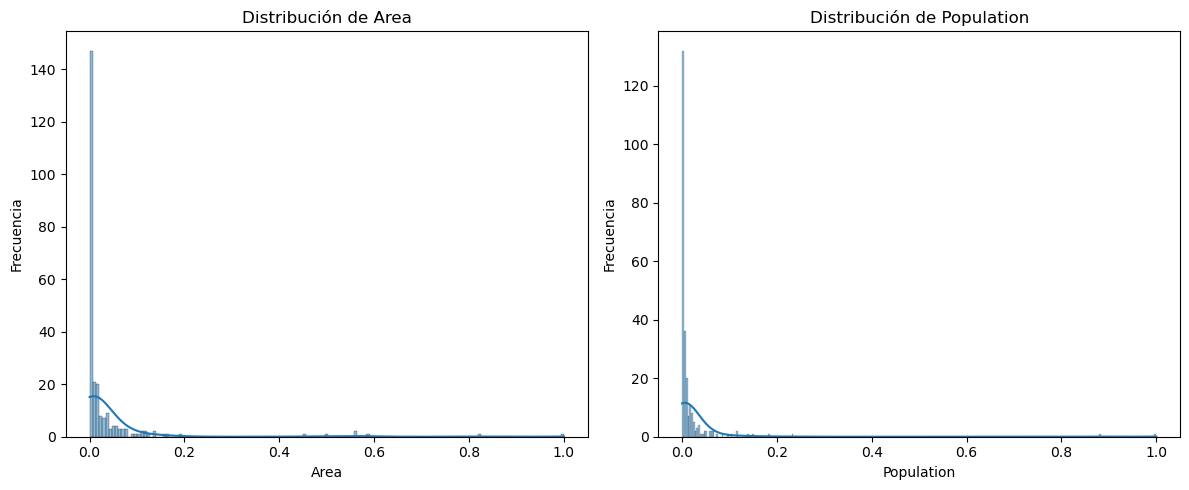

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos solo las columnas "area" y "population"
columns_to_plot = ['area', 'population']

# Creamos la figura y los ejes
f, axes = plt.subplots(1, 2, figsize=(12, 5))

# Recorremos y graficamos cada columna
for i, col in enumerate(columns_to_plot):
    sns.histplot(dataFrameRescaledX[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Frecuencia')

# Ajustar el diseño
plt.tight_layout()
plt.show()


<a id="section22"></a>
## <font color="#004D7F"> 2.2. Estandarización</font>

Es más adecuada para técnicas que asumen una distribución gaussiana en las variables de entrada y funcionan mejor con datos reescalados, como Linear Regression, Logistic Regression y Linear Discriminant Analysis. Puede estandarizar datos utilizando la clase [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Los valores para cada atributo ahora tienen un valor medio de $0$ y una desviación estándar de $1$

In [24]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX =scaler.transform(X)
print(names)
print(rescaledX[0 : 5, : ])


['area', 'population']
[[-0.313 -0.234]
 [-0.27  -0.192]
 [ 0.027  0.016]
 [-0.313 -0.234]
 [-0.313 -0.235]]


In [25]:
# Convertimos el Numpy Array a dataframe
transform_df = pd.DataFrame(rescaledX, columns=names[0:8])
transform_df = transform_df.round(3)
transform_df

,area,population
0,-0.313,-0.234
1,-0.270,-0.192
2,0.027,0.016
3,-0.313,-0.234
4,-0.313,-0.235
...,...,...
247,0.329,0.187
248,0.083,-0.119
249,-0.108,-0.122
250,-0.259,-0.142


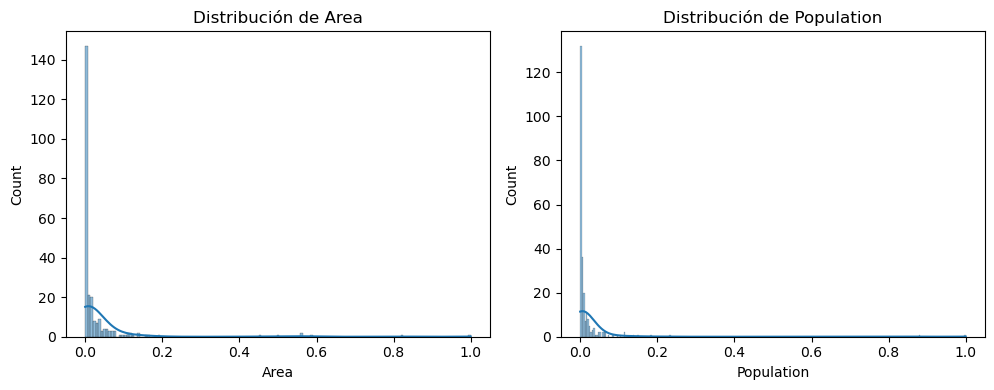

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que transform_df está definido
if 'transform_df' not in locals():
    transform_df = dataFrameRescaledX  # Usa dataFrameRescaledX como base para transform_df

# Lista de columnas que deseas graficar
columns_to_plot = [
    "area", "population", "gdp", "life_expectancy",
    "education_index", "internet_users", "urbanization"
]

# Filtra solo las columnas que existen en transform_df
existing_columns = [col for col in columns_to_plot if col in transform_df.columns]

# Crear la figura con tamaño ajustado a la cantidad de gráficas válidas
n_cols = 3
n_rows = (len(existing_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # Aplanar para indexar fácilmente

# Graficar solo las columnas existentes
for i, col in enumerate(existing_columns):
    sns.histplot(transform_df[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())

# Eliminar los ejes vacíos restantes (si los hay)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<a id="section23"></a>
## <font color="#004D7F"> 2.3. Normalización</font>

Este método de preprocesamiento puede ser útil para conjuntos de datos dispersos (muchos ceros) con atributos de escalas variables cuando se utilizan algoritmos que ponderan valores de entrada como Neural Networks y algoritmos que usan medidas de distancia como k-Nearest Neighbours.

Puede normalizar datos en Python con la clase [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html). Las filas están normalizadas a la longitud $1$

In [27]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
print(names)
print(normalizedX[0 : 5, : ])

['area', 'population']
[[0.006 1.   ]
 [0.017 1.   ]
 [0.022 1.   ]
 [0.005 1.   ]
 [0.008 1.   ]]


In [28]:
# Convertimos el Numpy Array a dataframe
transform_df = pd.DataFrame(normalizedX, columns=names[0:8])
transform_df = transform_df.round(3)
transform_df

,area,population
0,0.006,1.000
1,0.017,1.000
2,0.022,1.000
3,0.005,1.000
4,0.008,1.000
...,...,...
247,0.025,1.000
248,0.056,0.998
249,0.030,1.000
250,0.009,1.000


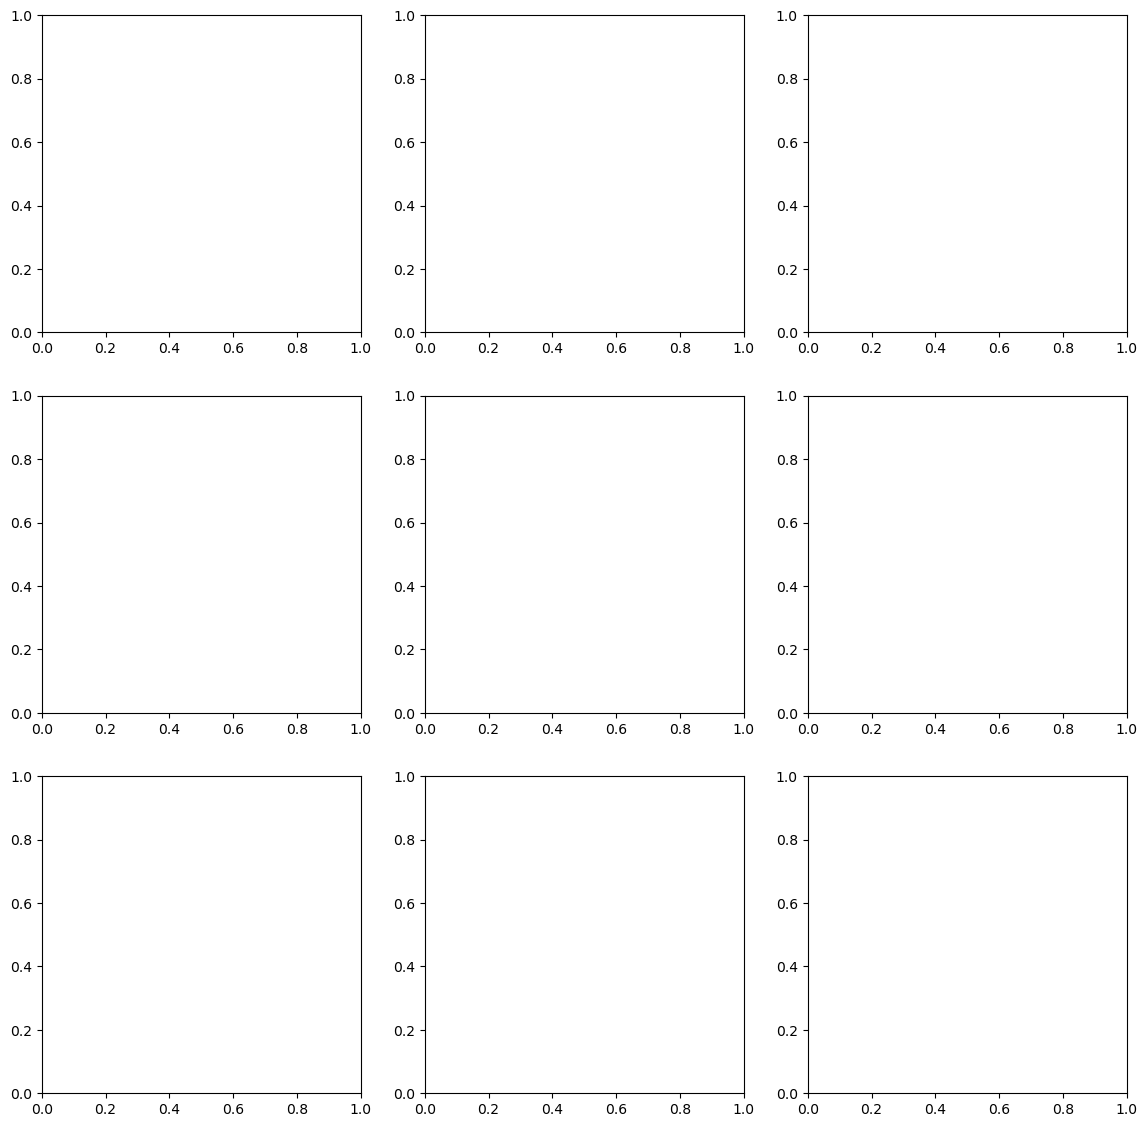

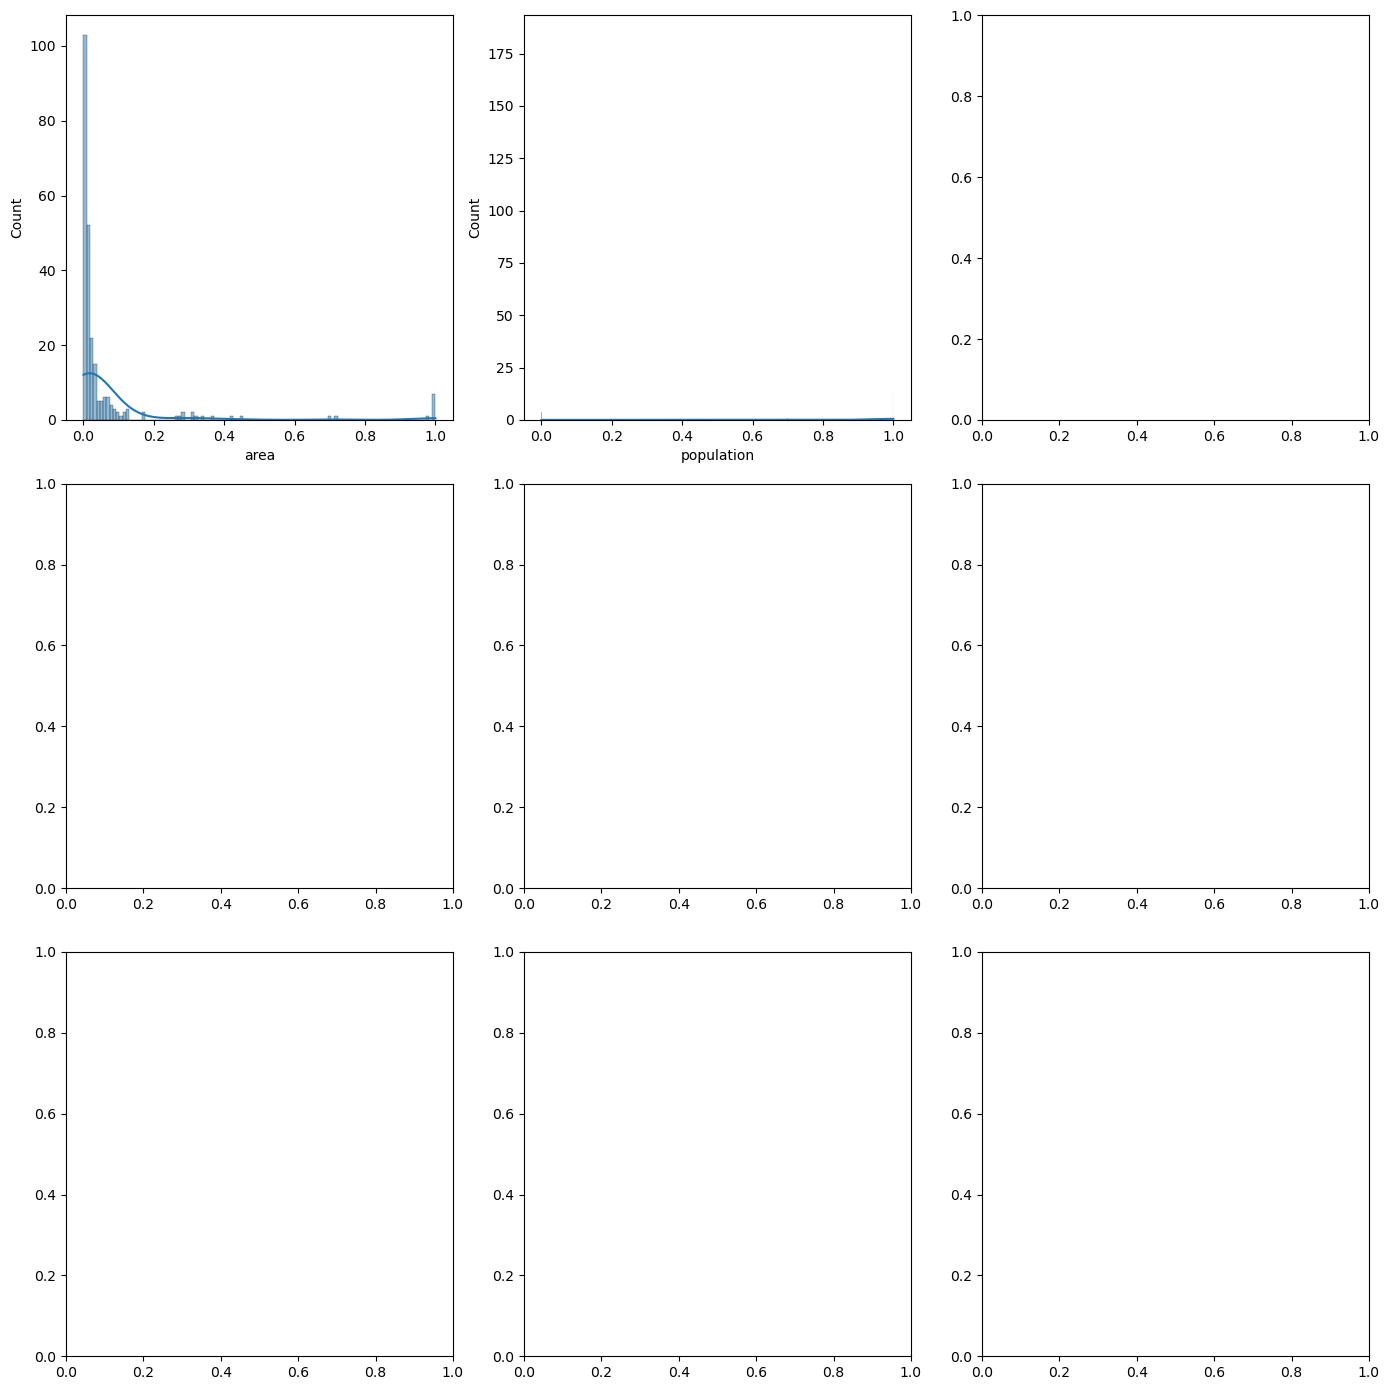

In [30]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns

# Crear los subplots
f, axes = plt.subplots(3, 3, figsize=(14, 14))

# Gráficas univariadas para columnas numéricas de countries
sns.histplot(transform_df["area"], kde=True, ax=axes[0, 0]) if "area" in transform_df.columns else None
sns.histplot(transform_df["population"], kde=True, ax=axes[0, 1]) if "population" in transform_df.columns else None
sns.histplot(transform_df["gdp"], kde=True, ax=axes[0, 2]) if "gdp" in transform_df.columns else None
sns.histplot(transform_df["life_expectancy"], kde=True, ax=axes[1, 0]) if "life_expectancy" in transform_df.columns else None
sns.histplot(transform_df["education_index"], kde=True, ax=axes[1, 1]) if "education_index" in transform_df.columns else None
sns.histplot(transform_df["internet_users"], kde=True, ax=axes[1, 2]) if "internet_users" in transform_df.columns else None
sns.histplot(transform_df["urbanization"], kde=True, ax=axes[2, 0]) if "urbanization" in transform_df.columns else None

# Ajustar la presentación de los gráficos
plt.tight_layout()  # Ajusta los subplots para que no se sobrepongan
plt.show()



<a id="section24"></a>
## <font color="#004D7F"> 2.4. Binarización</font>

Puede crear nuevos atributos binarios en Python usando la clase [Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html). Puede ver que todos los valores iguales o menores que 0 están marcados con 0 y todos los que están por encima de 0 están marcados con 1.

In [31]:
# binarization
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(X) # en el ajuste se indica que si es menor a 0.0 se asigna 0 de lo contrario 1
binaryX = binarizer.transform(X)
print(names)
print(binaryX[0 : 5, : ])

['area', 'population']
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [32]:
# Convertimos el Numpy Array a dataframe
transform_df = pd.DataFrame(binaryX, columns=names[0:8])
transform_df

,area,population
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
247,1.0,1.0
248,1.0,1.0
249,1.0,1.0
250,1.0,1.0


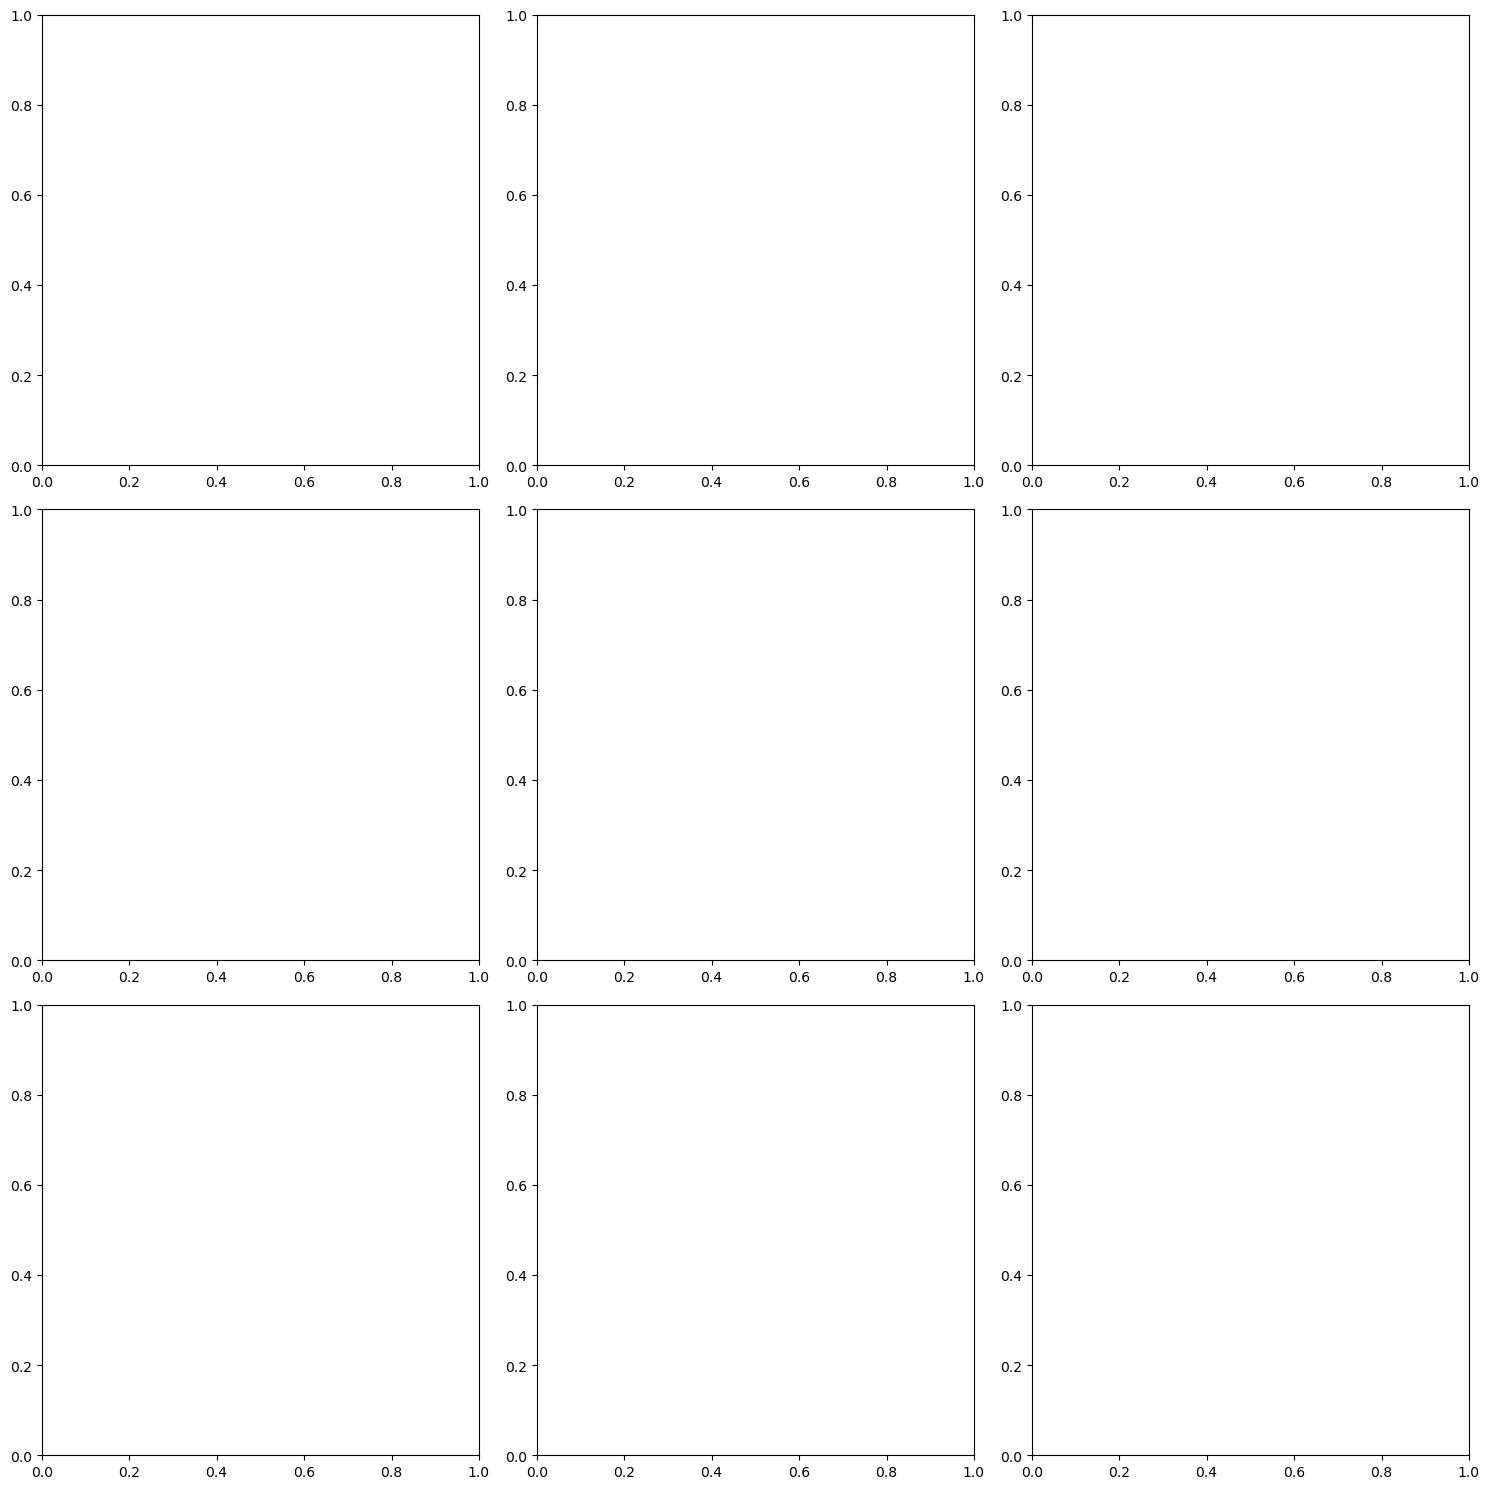

In [33]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(3, 3, figsize=(15, 15))

# Gráficas univariadas para las columnas de transform_df
sns.histplot(transform_df["preg"], kde=True, ax=axes[0, 0]) if "preg" in transform_df.columns else None
sns.histplot(transform_df["plas"], kde=True, ax=axes[0, 1]) if "plas" in transform_df.columns else None
sns.histplot(transform_df["pres"], kde=True, ax=axes[0, 2]) if "pres" in transform_df.columns else None
sns.histplot(transform_df["skin"], kde=True, ax=axes[1, 0]) if "skin" in transform_df.columns else None
sns.histplot(transform_df["test"], kde=True, ax=axes[1, 1]) if "test" in transform_df.columns else None
sns.histplot(transform_df["mass"], kde=True, ax=axes[1, 2]) if "mass" in transform_df.columns else None
sns.histplot(transform_df["pedi"], kde=True, ax=axes[2, 0]) if "pedi" in transform_df.columns else None
sns.histplot(transform_df["age"], kde=True, ax=axes[2, 1]) if "age" in transform_df.columns else None

# Mostrar los gráficos
plt.tight_layout()  # Ajusta los subplots para que no se sobrepongan
plt.show()


<a id="section25"></a>
## <font color="#004D7F"> 2.5. Box-Cox</font>

En ocasiones los atributos representan el llamado sesgo o inclinación, que es cuando un atributo tiene una distribución similar a la Gaussiana pero esta se encuentra desplazada. Para este tipo de casos, se utiliza la transformación Box-Cox, la cual asume que todos los valores son positivos, que lo que realiza es el sesgo y hacer más Gaussiana la distribución de este atributo. Nótese que aplicamos la transformación sólo a dos atributos que parecen tener un sesgo.

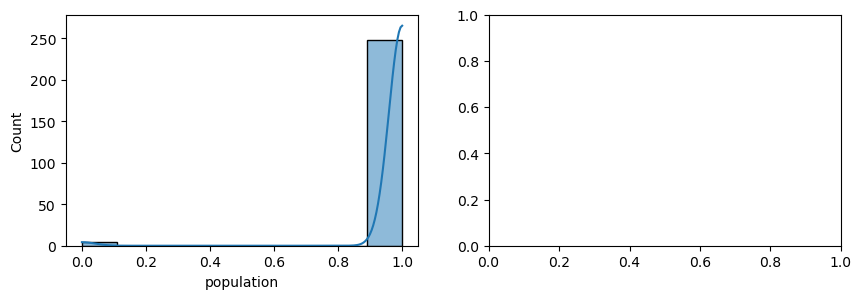

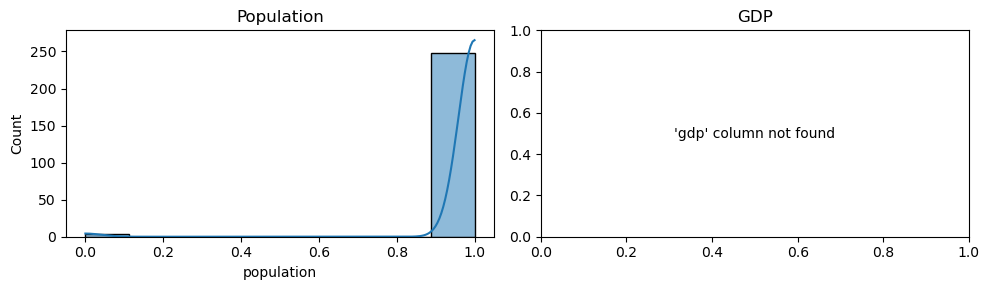

In [35]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(1, 2, figsize=(10, 3))

# Aquí pones las columnas que desees analizar
sns.histplot(transform_df["population"], kde=True, ax=axes[0])

# Check if 'gdp' exists in the DataFrame before plotting
if "gdp" in transform_df.columns:
	sns.histplot(transform_df["gdp"], kde=True, ax=axes[1])
else:
	axes[1].text(0.5, 0.5, "'gdp' column not found", horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)
	axes[1].set_title('GDP')

axes[0].set_title('Population')
axes[1].set_title('GDP')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


Como vemos, ese sesgo tenemos que corregirlo y para ello utilizaremos la clase [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html). Una vez realizada la transformación podemos ver como se encuentra corregido el sesgo inicial de ambas características.

In [ ]:
# Box-Cox Transform
from sklearn.preprocessing import PowerTransformer
# Extremos las características (features) con sesgos (skew)
features = data[['pedi', 'age']]
# Definimos el método a utilizar box-cox
pt = PowerTransformer(method='box-cox', standardize=True)
# Se realiza el ajuste con el método fit
skl_boxcox = pt.fit(features)
# Obtenemos el valor de lambda
calc_lambdas =skl_boxcox.lambdas_
#print (skl_boxcox.lambdas_)
print(calc_lambdas)
#Transform the data 
skl_boxcox = pt.transform(features)
# convertimos los datos transformado a un nuevo dataframe
df_features = pd.DataFrame(data=skl_boxcox, columns=['pedi','age'])
#print(df_features)
# pasar las características transformadas al data set original
#·· 1. borramos los datos pedi y age del data original
data.drop(['age'], axis=1, inplace=True)
data.drop(['pedi'], axis=1, inplace=True)
#print(data)
#·· 2. Concatenar ambos DataFrames
df_data = pd.concat([data, df_features], axis=1)
# Pasa el último elemento al primero de la lista (2 veces)
cols = df_data.columns.to_list()
#print(cols)
cols = cols[-1:]+cols[:-1]
cols = cols[-1:]+cols[:-1]
# Sobrescribimos
df_data = df_data[cols]
df_data

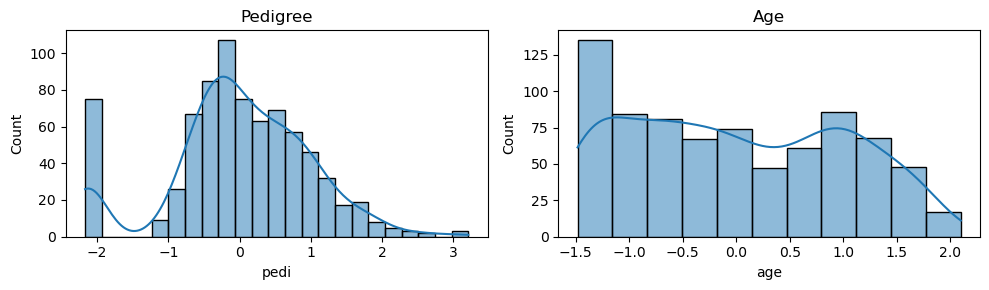

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(df_data[""],kde=True, ax=axes[0])
sns.histplot(df_data["age"],kde=True, ax=axes[1])
axes[0].set_title('Pedigree')
axes[1].set_title('Age')
# Mostrar los gráficos
plt.tight_layout()
plt.show()

### Yeo Johnson

<a id="section26"></a>
## <font color="#004D7F"> 2.6. Yeo-Johnson</font>

La transformación de Yeo-Johnson es otra transformación de potencia como Box-Cox, pero soporta valores en bruto (sin procesar) que son iguales a cero y negativos. Para utilizar esta transformación únicamente tenemos que poner en la propiedad `method` de la clase `PowerTransformer` el valor `yeo-johnson` o directamente no poner `method` ya que por defecto utiliza esta transoformación.

In [ ]:
# yeo-johnson Transform
from sklearn.preprocessing import PowerTransformer
# Extremos las características (features) con sesgos (skew)
features = data[['pedi', 'age']]
# Definimos el método a utilizar yeo-johnson
pt = PowerTransformer(method='yeo-johnson', standardize=True)
# Se realiza el ajuste con el método fit
skl_boxcox = pt.fit(features)
# Obtenemos el valor de lambda
calc_lambdas =skl_boxcox.lambdas_
#print (skl_boxcox.lambdas_)
print(calc_lambdas)
#Transform the data 
skl_boxcox = pt.transform(features)
# convertimos los datos transformado a un nuevo dataframe
df_features = pd.DataFrame(data=skl_boxcox, columns=['pedi','age'])
#print(df_features)
# pasar las características transformadas al data set original
#·· 1. borramos los datos pedi y age del data original
data.drop(['age'], axis=1, inplace=True)
data.drop(['pedi'], axis=1, inplace=True)
#print(data)
#·· 2. Concatenar ambos DataFrames
df_data = pd.concat([data, df_features], axis=1)
# Pasa el último elemento al primero de la lista (2 veces)
cols = df_data.columns.to_list()
#print(cols)
cols = cols[-1:]+cols[:-1]
cols = cols[-1:]+cols[:-1]
# Sobrescribimos
df_data = df_data[cols]
df_data

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(df_data["pedi"],kde=True, ax=axes[0])
sns.histplot(df_data["age"],kde=True, ax=axes[1])
axes[0].set_title('Pedigree')
axes[1].set_title('Age')
# Mostrar los gráficos
plt.tight_layout()
plt.show()

<a id="section26"></a>
### <font color="#004D7F"> Coeficiente Box-Cox y Yeo-Johnson</font>

Estas transforamciones surgen ya que en determinadas ocasionas se utilizan una transformación logarítmica o de raíz cuadrada a los datos pero sin saber muy bien cual de los dos tendrá una mejor incidencia. Estas dos transformaciones realizan ese análisis y establece la mejor transforamción para sus datos. 

Podemos usar una versión generalizada de la transformación que encuentre un parámetro (lambda) que mejor transforme una variable en una distribución de probabilidad gaussiana (si logarítmica o raíz cuadrada, por ejemplo). Hay dos enfoques populares para tales transformaciones automáticas de energía; son:

Si nos hemos fijado `PowerTransform` tiene una propiedad llamada `lambdas_`, a menudo denominado lambda, se usa para controlar la naturaleza de la transformación. A continuación se presentan algunos valores comunes para _lambda:_
 * _lambda = -1_ es una transformación recíproca.
 * _lambda = -0.5_ es una transformación de raíz cuadrada recíproca.
 * _lambda = 0.0_ es una transformación logarítmica.
 * _lambda = 0.5_ es una transformación de raíz cuadrada.
 * _lambda = 1.0_ no es una transformación.

Veamos el coeficiente de de las dos variables son:

In [ ]:
print(f"Lambda de Box-Cox: {calc_lambdas_bc}")
print(f"Lambda de Yeo-Johnson: {calc_lambdas_yo}")

Podemos observar que a la primera variable le ha realizado una raíz cudrada recíproca y a la segunda una transforamción recíproca.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>